In [ ]:
!conda install -c conda-forge altair vega_datasets

In [1]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
import pandas as pd

In [5]:
df_seinfeld = pd.DataFrame([
    ['season1' , 2_000_000],
    ['season2' , 4_000_000],
    ['season3' , 30_000_000],
    ['season4' , 40_000_000],
    ['season5' , 60_000_000],
    ['season6' , 100_000_000],
    ['season7' , 110_000_000],
    ['season8' , 120_000_000],
    ['season9' , 150_000_000],
],
columns=['season',"views"])

In [9]:
df_seinfeld['season'] = df_seinfeld['season'].apply(lambda x: int(x[-1]))

In [10]:
df_seinfeld

,season,views
0,1,2000000
1,2,4000000
2,3,30000000
3,4,40000000
4,5,60000000
5,6,100000000
6,7,110000000
7,8,120000000
8,9,150000000


In [11]:
from matplotlib import pyplot as plt

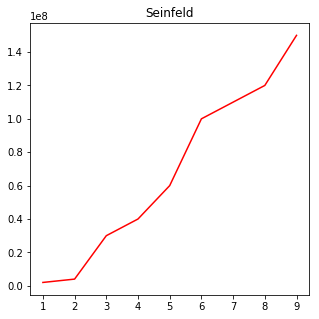

In [24]:
plt.figure(figsize=(5, 5))
plt.plot(df_seinfeld['season'], df_seinfeld.views, c='r')
plt.title('Seinfeld');

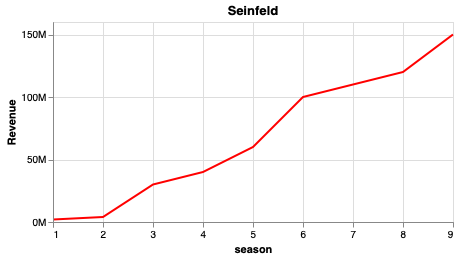

In [37]:
chart = (
    alt.Chart(df_seinfeld)
    .mark_line(
        color='red'
    )
    .encode(
        x=alt.X('season'), 
        y=alt.Y('views', axis=alt.Axis(format='s', title='Revenue'))
    )
    .properties(
        width=400, 
        height=200,
        title='Seinfeld'
    )
)

chart

In [46]:
df_xmas = pd.DataFrame([
    ['1' , 'Pear Tree', 2_522, 'Other'],
    ['2' , 'Turtle Doves', 3_300, 'Animal'],
    ['3' , 'French Hens', 1_1815, 'Animal'],
    ['4' , 'Calling Birds', 5_400, 'Animal'],
    ['5' , 'Rings', 6_600, 'Other'],
    ['6' , 'Geese', 2_940, 'Animal'],
    ['7' , 'Swans', 78_750, 'Animal'],
    ['8' , 'Milking Maids', 290, 'Human'],
    ['9' , 'Dancing Ladies', 30_211, 'Human'],
    ['10' , 'Lords', 30_000, 'Human'],
    ['11' , 'Pipers', 5_498, 'Human'],
    ['12' , 'Drummers', 2_972, 'Human'],
],
columns=['Day',"Gifts", 'price', 'category'])

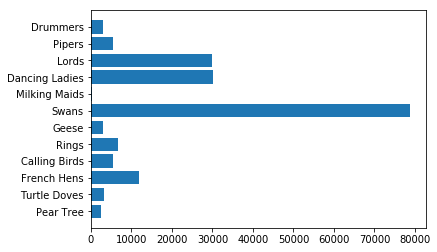

In [47]:
plt.barh(df_xmas['Gifts'], df_xmas['price']);

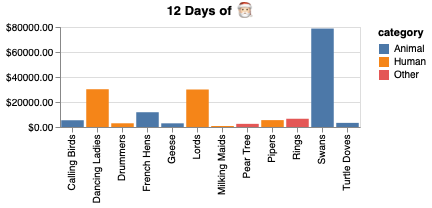

In [56]:
(
    alt.Chart(df_xmas)
    .mark_bar()
    .encode(
        x=alt.X('Gifts', axis=alt.Axis(title='')),
        y=alt.Y('price', axis=alt.Axis(format='$.2f', title='')),
        color='category'
    )
    .properties(height=100, width=300, title='12 Days of 🎅🏻')
)

In [76]:
import numpy as np

n = 100

x = np.random.randint(low=10, high=100, size=n) / 10

y = (20 + 30 * x + np.random.normal(0, 30, size=n)).round(2)

y

df_gift = pd.DataFrame({
    'size': x, 
    'price': y
})

In [93]:
df_gift['year'] = [2018] * 50 + [2019] * 50

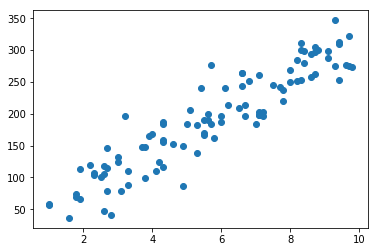

In [85]:
plt.scatter(df_gift['size'], df_gift['price'])

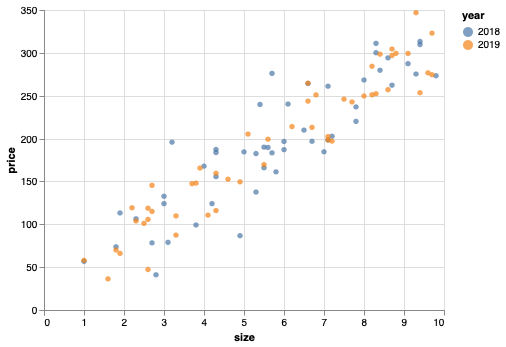

In [100]:
(
    alt.Chart(df_gift)
    .mark_circle()
    .encode(x='size', y='price', color='year:N', tooltip=['year', 'price'])
    .interactive()
)

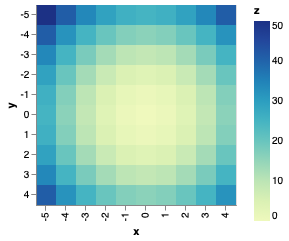

In [103]:
# Compute x^2 + y^2 across a 2D grid
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

# Convert this grid to columnar data expected by Altair
source = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(source).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)

In [105]:
df = pd.read_csv('data/books.csv')

In [107]:
df['end'] = pd.to_datetime(df['end'])

In [111]:
df['year'] = df['end'].dt.year

In [113]:
df = df.sort_values('end')

In [115]:
df['read'] = 1 

In [125]:
df['week'] = df['end'].dt.dayofyear // 7 + 1

In [128]:
df['read'] = df.groupby(['year'])['read'].cumsum()

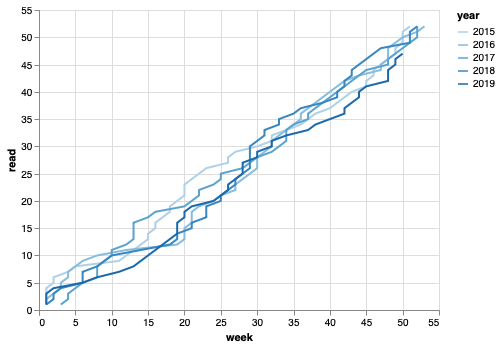

In [134]:
alt.Chart(df).mark_line().encode(x='week', y='read', color='year:O').interactive()

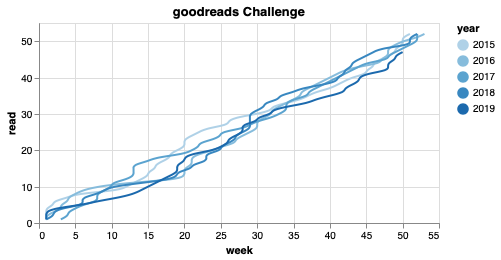

In [136]:
nearest = alt.selection(
        type='single',
        nearest=True,
        on='mouseover',
        fields=['week'],
        empty='none'
    )

line = (
    alt.Chart(df)
    .mark_line(interpolate='basis')
    .encode(
        x='week',
        y='read',
        color='year:O'
    )
)

selectors = (
    alt.Chart(df)
    .mark_point()
    .encode(
        x='week',
        opacity=alt.value(0)
    )
    .add_selection(nearest)
)

points = (
    line
    .mark_point()
    .encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )
)

text = (
    line
    .mark_text(align='left', dx=5, dy=-5)
    .encode(
        text=alt.condition(nearest, 'read', alt.value(' '))
    )
)

rules = (
    alt.Chart(df)
    .mark_rule(color='red')
    .encode(x='week')
    .transform_filter(nearest)
)

chart = (
    alt.layer(line, selectors, points, rules, text)
    .properties(
        width=400,
        height=200,
        background='white',
        title='goodreads Challenge'
    )
)

chart

In [148]:
cars = alt.load_dataset('cars')

cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


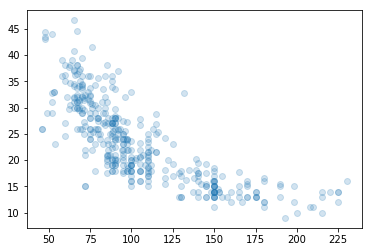

In [166]:
plt.scatter(cars['Horsepower'], cars['Miles_per_Gallon'], alpha=1/5);

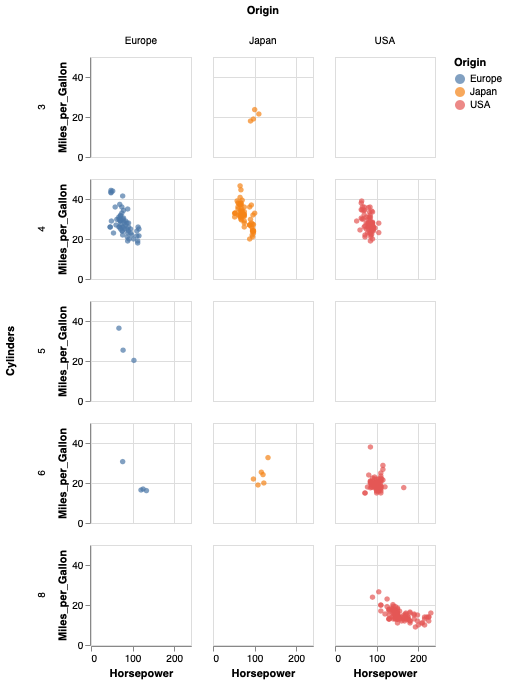

In [169]:
(
    alt.Chart(cars)
    .encode(
        x='Horsepower', 
        y='Miles_per_Gallon',
        color='Origin', 
        tooltip=['Name']
    )
    .mark_circle()
    .properties(width=100, height=100)
    .facet(column='Origin', row='Cylinders')
    .interactive()
)

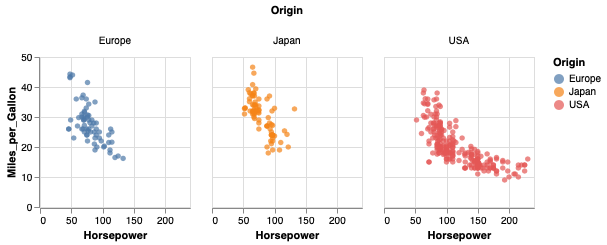

In [175]:
brush = alt.selection_interval()

(
    alt.Chart(cars)
    .mark_circle()
    .encode(
        x='Horsepower',
        y='Miles_per_Gallon',
        color=alt.condition(brush, 'Origin', alt.value('black'))
    )
    .properties(selection=brush, height=150, width=150)
    .facet(column='Origin:N')
)

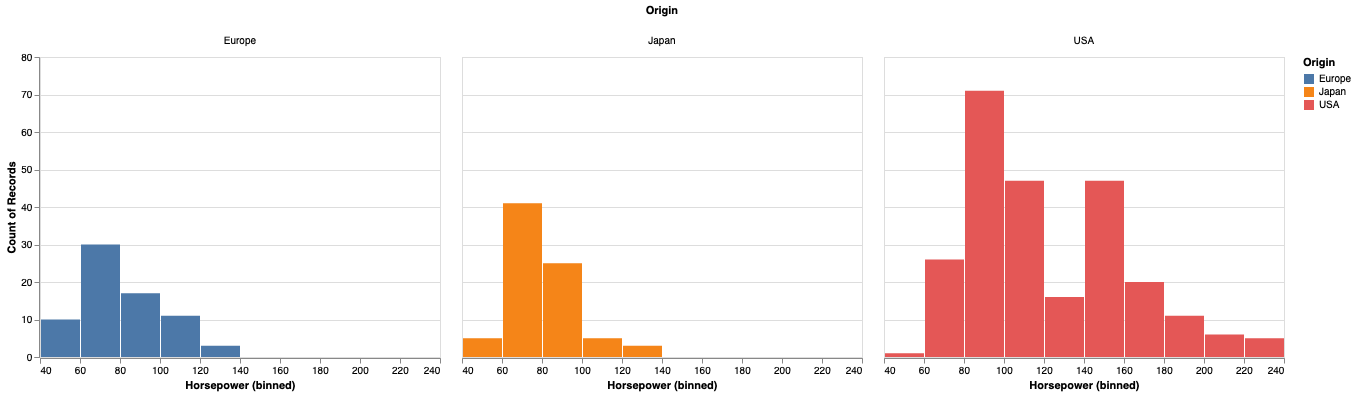

In [176]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Horsepower', bin=True),
    y='count(*):Q',
    color='Origin',
).facet(column='Origin:N')

In [177]:
candy = pd.read_csv('data/candy.csv')
chocolate = candy[candy['chocolate'] == 1]

In [178]:
candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


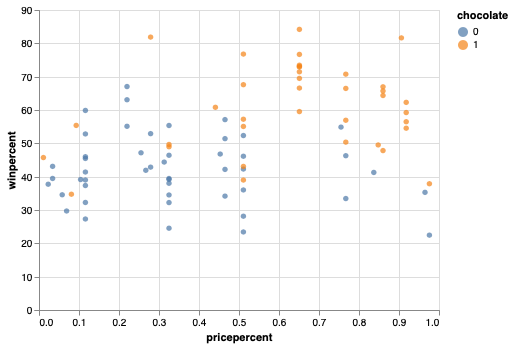

In [184]:
(
    alt.Chart(candy)
    .encode(
        x='pricepercent', 
        y='winpercent', 
        color='chocolate:N'
    )
    .mark_circle()
)

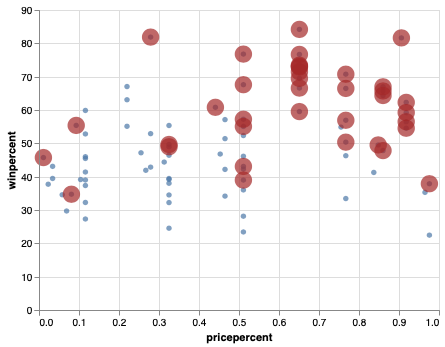

In [179]:
v1 = alt.Chart(candy).encode(x='pricepercent', y='winpercent').mark_circle()
v2 = alt.Chart(chocolate).encode(x='pricepercent', y='winpercent').mark_circle(color='brown', size=300)

alt.layer(v1, v2)

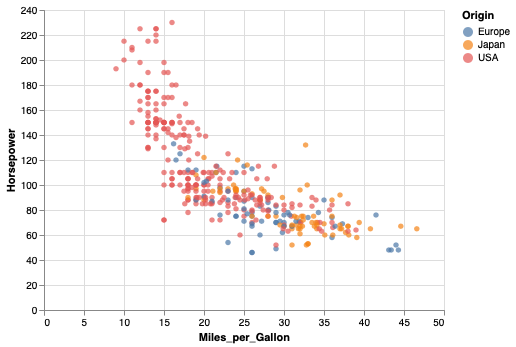

In [185]:
# the 'empty' setting makes all text hidden before any mouseover occurs.
pointer = alt.selection_single(on='mouseover', nearest=True, empty='none')

base = alt.Chart().encode(
    x='Miles_per_Gallon', y='Horsepower'
)

chart = alt.layer(
    base.mark_circle().properties(selection=pointer).encode(color='Origin'),
    base.mark_text(dx=8, dy=3, align='left').encode(text=alt.condition(pointer, 'Name', alt.value(''))),
    data=cars
)

chart

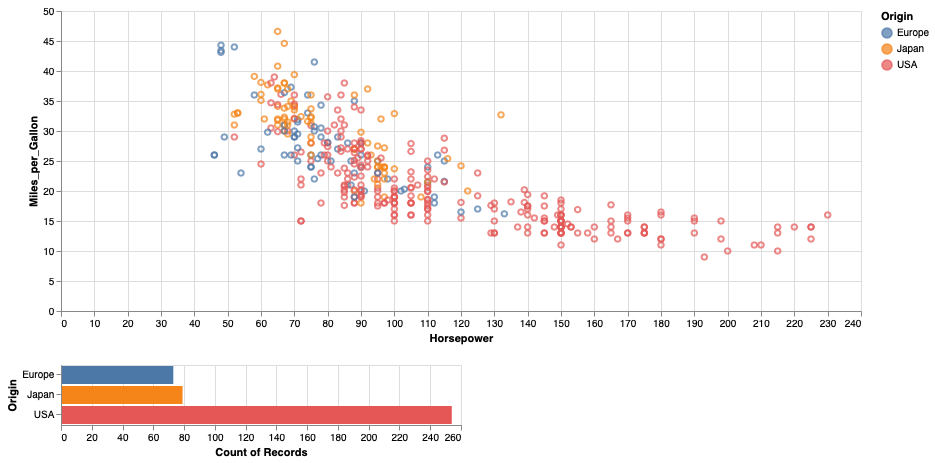

In [186]:
brush = alt.selection(type='interval')

# the top scatterplot
points = alt.Chart().mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).properties(
    selection=brush,
    width=800
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
)

chart = alt.vconcat(points, bars, data=cars)
chart